___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import tensorflow as tf

# Detect hardware
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
except ValueError:
  tpu = None

# Select appropriate distribution strategy
if tpu:
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
  strategy = tf.distribute.get_strategy() # for CPU and single GPU


In [315]:
sns.set_style("whitegrid")
sns.set_palette("pastel")


In [2]:
pip install scikit-plot

In [3]:
#pip install wordcloud

In [4]:
#!pip install nltk

In [5]:
#pip install --upgrade tensorflow

In [125]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import re
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None) # Will show the whole text


In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Nov 16 07:37:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
from google.colab import files
uploaded = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews (1).csv


In [10]:
df= pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses


In [11]:
df.shape

(23486, 11)

In [12]:
df['Review Text'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                         Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is tr

### Data Wrangling

In [13]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [16]:
df.duplicated().sum()

0

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

Text(0.5, 1.0, 'Distribution of Age')

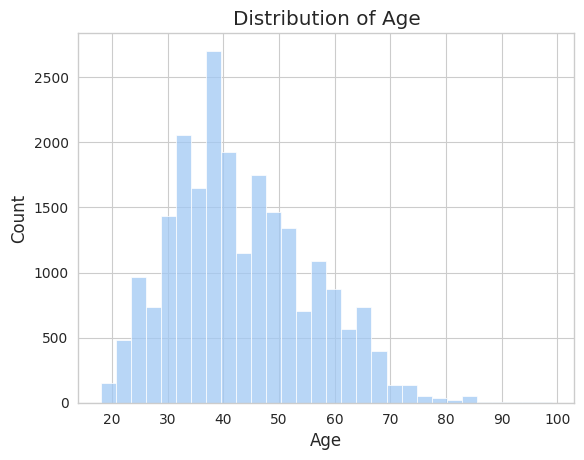

In [306]:
# Distribution of Age
plt.subplot(1, 1, 1)
sns.histplot(df['Age'], bins=30, kde=False)
plt.title('Distribution of Age')



Text(0.5, 1.0, 'Distribution of Recommendations')

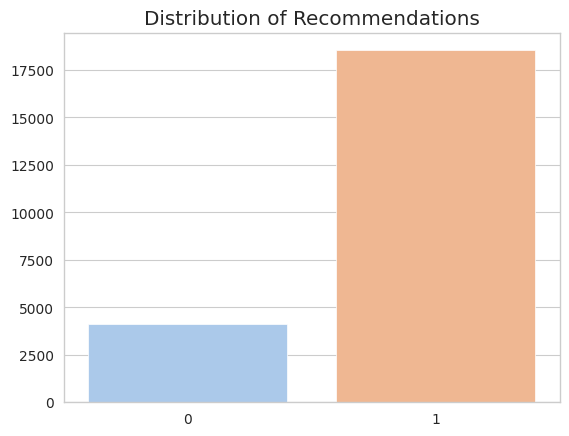

In [305]:

plt.subplot(1,1 , 1)
recommend_counts = df['Recommended IND'].value_counts().sort_index()
sns.barplot(x=recommend_counts.index, y=recommend_counts.values)
plt.title('Distribution of Recommendations')



We notice that number of people who recommended the product are vatsly larger about 180000, while only 4000~ did not recommend the product. We are dealing with imbalanced dataset.

Text(0.5, 1.0, 'Distribution of Ratings')

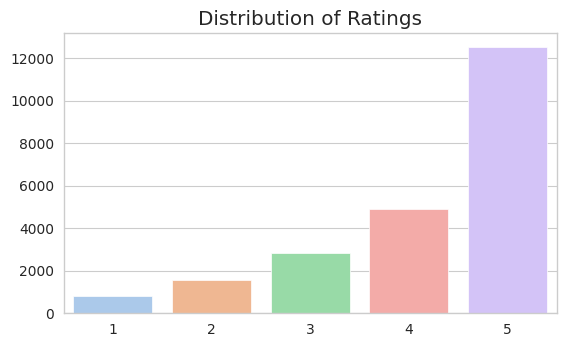

In [304]:

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
rating_counts = df['Rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Ratings')



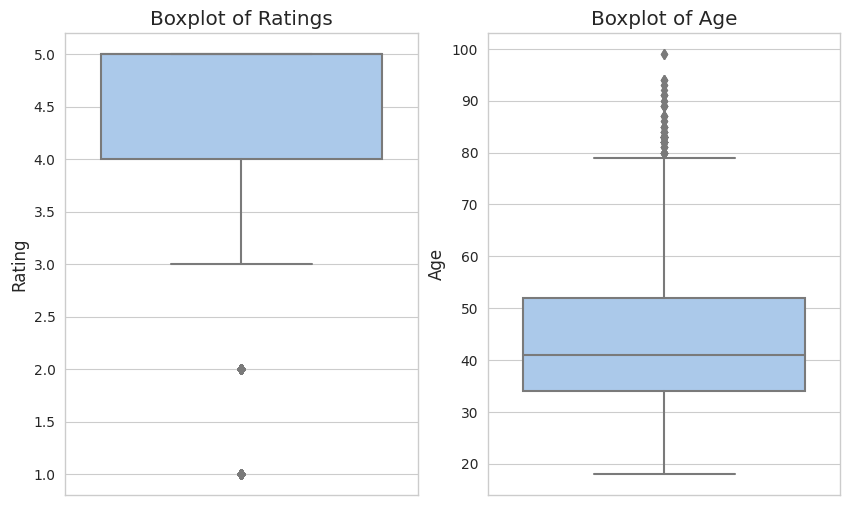

In [318]:
plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)
sns.boxplot(y=df['Rating'])
plt.title('Boxplot of Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')


#plt.tight_layout()
plt.show()


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [18]:
# Will keep the column names as is, will not rename them
df2 = df[["Review Text", "Recommended IND"]]
df2.head()

,Review Text,Recommended IND
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",0
6,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",1


---
---


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [19]:
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    #9. joining
    return " ".join( text_cleaned)

In [21]:
cleaning_text = df2["Review Text"].apply(cleaning)
cleaning_text.head(5)

2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3                                                                                                                                                                                                                      love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                                                                                                                                shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt
5                                          love tracy reese dress one petite foot tall u

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [22]:
positive_reviews = df2[df2['Recommended IND'] == 1]['Review Text']
negative_reviews = df2[df2['Recommended IND'] == 0]['Review Text']

In [23]:
positive_reviews.count()

16087

In [24]:
negative_reviews.count()

3575

### Collect Words (positive and negative separately)

In [25]:
# Collect words from positive reviews
positive_words = []
for review in positive_reviews:
    tokens = word_tokenize(review)
    positive_words.extend(tokens)



In [26]:
# Collect words from negative reviews
negative_words = []
for review in negative_reviews:
    tokens = word_tokenize(review)
    negative_words.extend(tokens)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

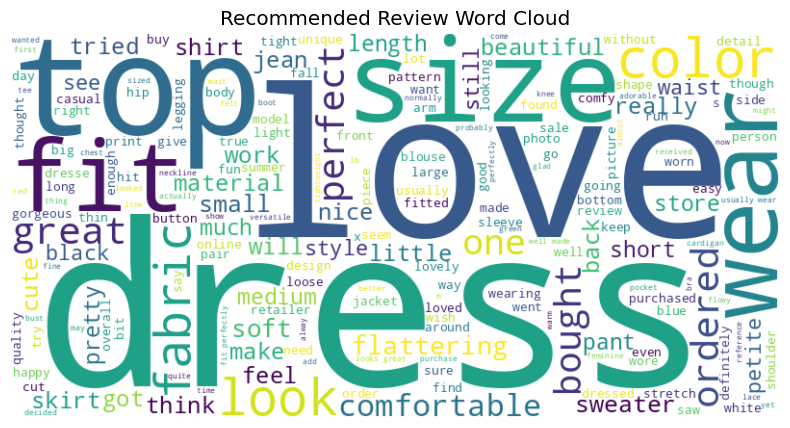

In [27]:
# Word Cloud for Recommended Reviews
recommended_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(recommended_wordcloud, interpolation='bilinear')
plt.title('Recommended Review Word Cloud')
plt.axis('off')
plt.show()



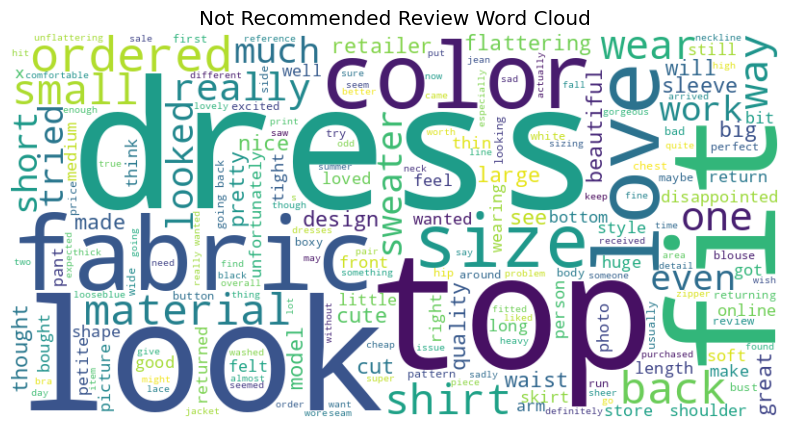

In [28]:
# Word Cloud for Not Recommended Reviews
not_recommended_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(not_recommended_wordcloud, interpolation='bilinear')
plt.title('Not Recommended Review Word Cloud')
plt.axis('off')
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df2.head(2)

,Review Text,Recommended IND
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1


In [31]:
X= df2['Review Text']
y= df2['Recommended IND']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [33]:
count_vectorizer = CountVectorizer(preprocessor=cleaning, min_df=5)
# min_df Ignore tokens that appear in less than 5 documents (comments) in the corpus
# Choosing 5 seems like a balanced choice giving the size of our dataset
# But the perfect numbers for any case require domain knowledge

In [34]:
X_train_count = count_vectorizer.fit_transform(X_train)

X_test_count = count_vectorizer.transform(X_test) # We do not fit to avoid data leakage

In [35]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
#pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

feature_names = count_vectorizer.get_feature_names_out()


In [37]:
pd.DataFrame(X_train_count.toarray(), columns=feature_names)

,abdomen,ability,able,absolute,absolutely,abt,abundance,ac,accent,accentuate,...,youthful,youve,yummy,zero,zip,zipped,zipper,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [38]:
tfidf_vectorizer = TfidfVectorizer()

In [39]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Eval Function

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def calculate_roc_auc(model, X_train, y_train, X_test, y_test):
    # Calculate the probabilities for the training set
    y_train_pred = model.predict(X_train).ravel()
    # Calculate ROC and AUC for the train dataset
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = roc_auc_score(y_train, y_train_pred)

    # Calculate the probabilities for the test set
    y_test_pred = model.predict(X_test).ravel()
    # Calculate ROC and AUC for the test dataset
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)

    # Plot ROC curves for the training and test sets
    plt.figure(figsize=(10, 8))
    plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance (area = 0.50)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc_train, roc_auc_test




In [43]:
def eval_scores(model, X_train, y_train):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average=None, labels=[0]),
        'recall': make_scorer(recall_score, average=None, labels=[0]),
        'f1': make_scorer(f1_score, average=None, labels=[0]),
    }

    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, n_jobs=-1) # Choosing 5 make stratify

    df_scores = pd.DataFrame(scores, index=range(1, 6)) # Range because of cv number
    return df_scores

## Logistic Regression

### CountVectorizer

In [44]:
reg_count = LogisticRegression(max_iter=1000)
reg_count.fit(X_train_count, y_train)

LogisticRegression(max_iter=1000)

In [45]:
reg_count_scores= eval_scores(reg_count, X_train_count, y_train)
reg_count_scores.mean()[2:]

test_accuracy      0.874881
train_accuracy     0.947072
test_precision     0.683846
train_precision    0.908439
test_recall        0.580070
train_recall       0.788374
test_f1            0.627538
train_f1           0.844157
dtype: float64

In [46]:
eval_metric(reg_count, X_train_count, y_train, X_test_count, y_test)

Test_Set
[[ 429  286]
 [ 157 3061]]
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       715
           1       0.91      0.95      0.93      3218

    accuracy                           0.89      3933
   macro avg       0.82      0.78      0.80      3933
weighted avg       0.88      0.89      0.88      3933


Train_Set
[[ 2189   671]
 [  271 12598]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      2860
           1       0.95      0.98      0.96     12869

    accuracy                           0.94     15729
   macro avg       0.92      0.87      0.89     15729
weighted avg       0.94      0.94      0.94     15729



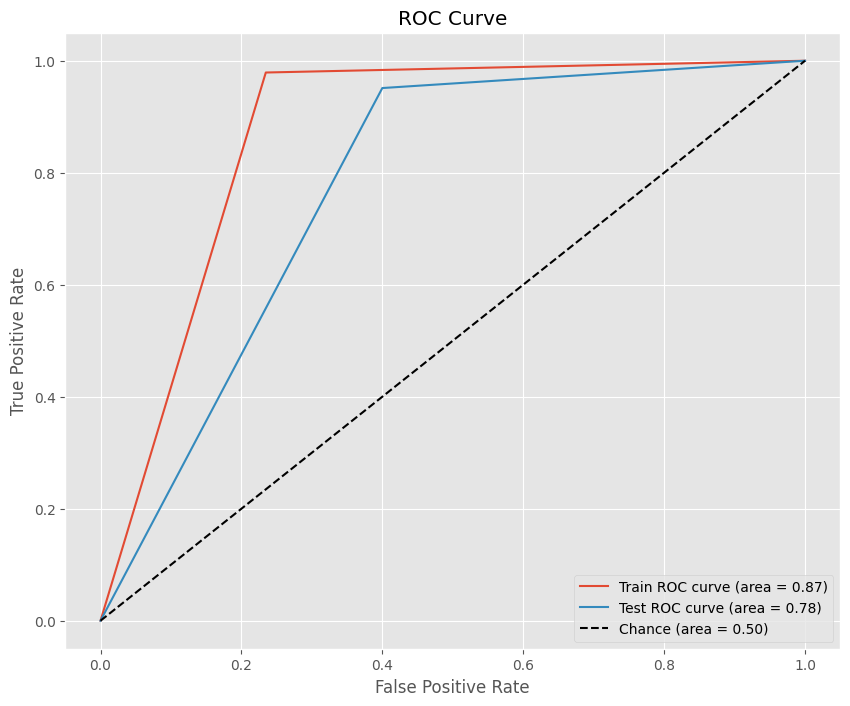

Train AUC: 0.87
Test AUC: 0.78


In [47]:
train_auc, test_auc = calculate_roc_auc(reg_count, X_train_count, y_train, X_test_count, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")



### TF-IDF

In [48]:
reg_tfidf  = LogisticRegression(max_iter=1000)
reg_tfidf .fit(X_train_tfidf , y_train)

LogisticRegression(max_iter=1000)

In [49]:
reg_tfidf_scores= eval_scores(reg_tfidf, X_train_tfidf , y_train)
reg_tfidf_scores.mean()[2:]

test_accuracy      0.882065
train_accuracy     0.907639
test_precision     0.785640
train_precision    0.865571
test_recall        0.483217
train_recall       0.582517
test_f1            0.598164
train_f1           0.696377
dtype: float64

In [50]:
eval_metric(reg_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)

Test_Set
[[ 368  347]
 [  91 3127]]
              precision    recall  f1-score   support

           0       0.80      0.51      0.63       715
           1       0.90      0.97      0.93      3218

    accuracy                           0.89      3933
   macro avg       0.85      0.74      0.78      3933
weighted avg       0.88      0.89      0.88      3933


Train_Set
[[ 1711  1149]
 [  288 12581]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.70      2860
           1       0.92      0.98      0.95     12869

    accuracy                           0.91     15729
   macro avg       0.89      0.79      0.83     15729
weighted avg       0.91      0.91      0.90     15729



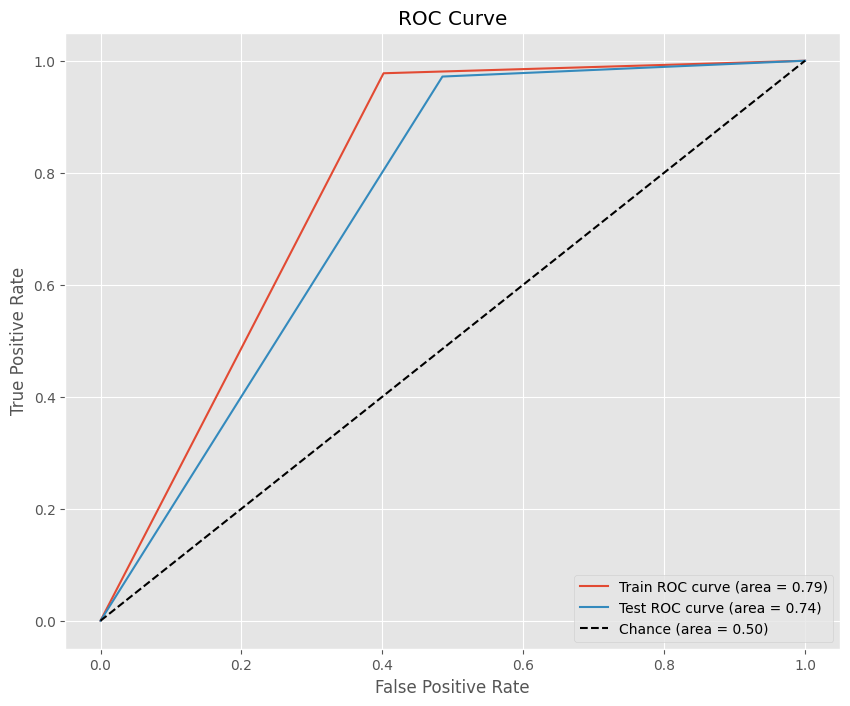

Train AUC: 0.79
Test AUC: 0.74


In [51]:
train_auc, test_auc = calculate_roc_auc(reg_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")


In [66]:
y_pred = reg_tfidf.predict(X_test_tfidf)
y_pred_proba= reg_tfidf.predict_proba(X_test_tfidf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

###Logistic regression/ Count (weight balanced)

In [52]:
# Now we will see if we can improve the regression count model, by adjusting the class weight and then  performing grid search
reg_count1 = LogisticRegression(max_iter=1000, class_weight='balanced')

In [53]:
reg_count1.fit(X_train_count, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [54]:
def eval_scores(reg_count1, X_train_count, y_train, class_weight='balanced'):
    scoring = {
        'precision': make_scorer(precision_score, average='binary', pos_label=1),
        'recall': make_scorer(recall_score, average='binary', pos_label=1),
        'f1': make_scorer(f1_score, average='binary', pos_label=1),
        'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
    }

    # If the model allows setting class_weight, set it to 'balanced'
    if 'class_weight' in reg_count1.get_params().keys():
        reg_count1.set_params(class_weight=class_weight)

    scores = cross_validate(reg_count1, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True, n_jobs=-1)

    df_scores = pd.DataFrame(scores, index=range(1, 6))
    return df_scores.mean()

In [55]:
scores = eval_scores(reg_count1, X_train_count, y_train)
print(scores)

fit_time           0.467603
score_time         0.010306
test_precision     0.941874
train_precision    0.993096
test_recall        0.880954
train_recall       0.925130
test_f1            0.910381
train_f1           0.957909
test_roc_auc       0.898036
train_roc_auc      0.983252
dtype: float64


In [56]:
eval_metric(reg_count1, X_train_count, y_train, X_test_count, y_test)


Test_Set
[[ 561  154]
 [ 363 2855]]
              precision    recall  f1-score   support

           0       0.61      0.78      0.68       715
           1       0.95      0.89      0.92      3218

    accuracy                           0.87      3933
   macro avg       0.78      0.84      0.80      3933
weighted avg       0.89      0.87      0.87      3933


Train_Set
[[ 2756   104]
 [ 1082 11787]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      2860
           1       0.99      0.92      0.95     12869

    accuracy                           0.92     15729
   macro avg       0.85      0.94      0.89     15729
weighted avg       0.94      0.92      0.93     15729



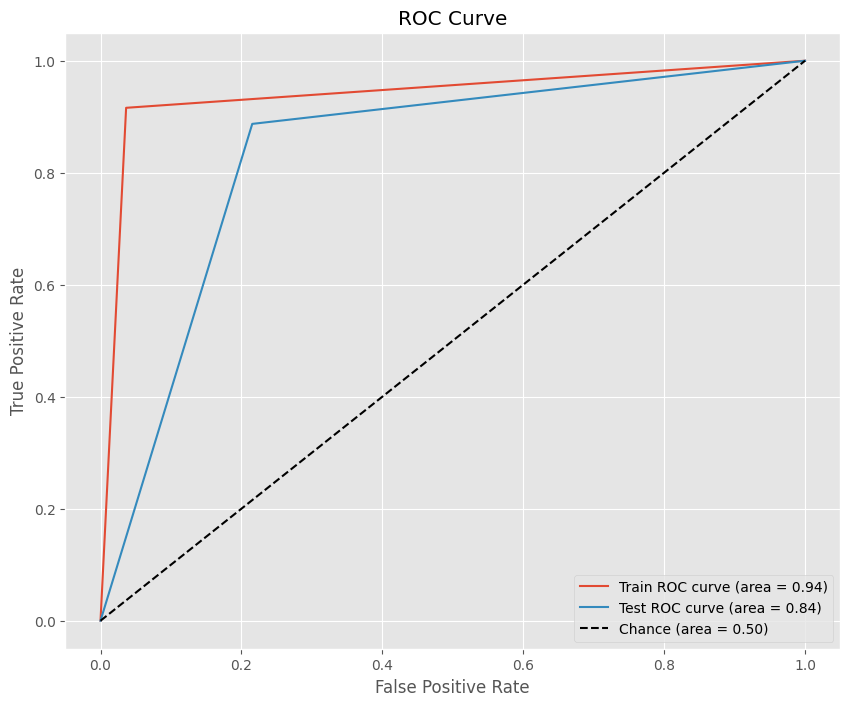

Train AUC: 0.94
Test AUC: 0.84


In [57]:


train_auc, test_auc = calculate_roc_auc(reg_count1, X_train_count, y_train, X_test_count, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization parameter
    'solver': ['liblinear', 'saga'], # Algorithm to use in the optimization problem
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train_count, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best AUC found: ", grid_search.best_score_)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'C': 1, 'solver': 'saga'}
Best AUC found:  0.9106810358265847


In [59]:
best_model = grid_search.best_estimator_
eval_metric(best_model, X_train_count, y_train, X_test_count, y_test)

Test_Set
[[ 561  154]
 [ 363 2855]]
              precision    recall  f1-score   support

           0       0.61      0.78      0.68       715
           1       0.95      0.89      0.92      3218

    accuracy                           0.87      3933
   macro avg       0.78      0.84      0.80      3933
weighted avg       0.89      0.87      0.87      3933


Train_Set
[[ 2755   105]
 [ 1082 11787]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      2860
           1       0.99      0.92      0.95     12869

    accuracy                           0.92     15729
   macro avg       0.85      0.94      0.89     15729
weighted avg       0.94      0.92      0.93     15729



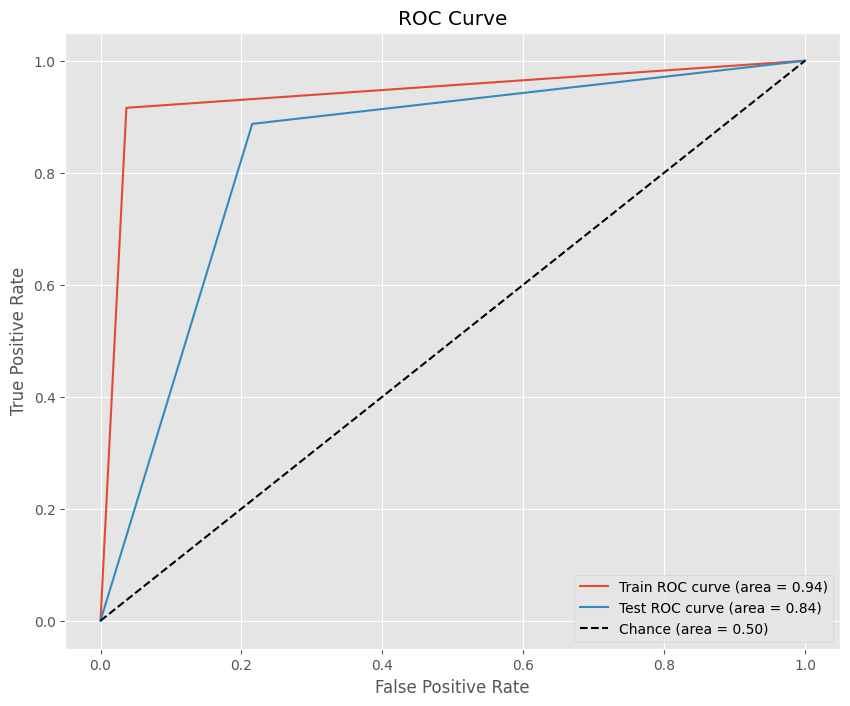

Train AUC: 0.94
Test AUC: 0.84


In [63]:
train_auc, test_auc = calculate_roc_auc(best_model, X_train_count, y_train, X_test_count, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")

There are no change in scores after performing grid search, model is overfitting

In [64]:
y_pred = best_model.predict(X_test_count)
y_pred_proba= best_model.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [72]:
nb_count = BernoulliNB(alpha=0.7)
nb_count.fit(X_train_count, y_train)

BernoulliNB(alpha=0.7)

In [73]:
nb_count_scores= eval_scores(nb_count, X_train_count, y_train)
print(nb_count_scores)

fit_time           0.014669
score_time         0.018734
test_precision     0.939323
train_precision    0.956478
test_recall        0.906674
train_recall       0.917903
test_f1            0.922700
train_f1           0.936794
test_roc_auc       0.918735
train_roc_auc      0.948228
dtype: float64


In [74]:
eval_metric(nb_count, X_train_count, y_train, X_test_count, y_test)

Test_Set
[[ 550  165]
 [ 305 2913]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       715
           1       0.95      0.91      0.93      3218

    accuracy                           0.88      3933
   macro avg       0.79      0.84      0.81      3933
weighted avg       0.89      0.88      0.88      3933


Train_Set
[[ 2323   537]
 [ 1094 11775]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      2860
           1       0.96      0.91      0.94     12869

    accuracy                           0.90     15729
   macro avg       0.82      0.86      0.84     15729
weighted avg       0.91      0.90      0.90     15729



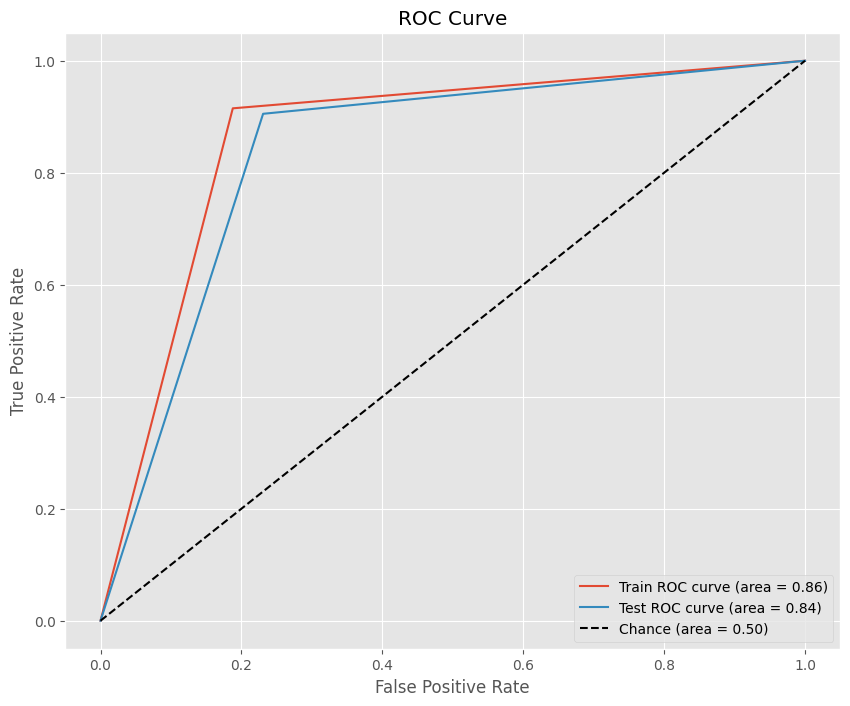

Train AUC: 0.86
Test AUC: 0.84


In [75]:
train_auc, test_auc = calculate_roc_auc(nb_count, X_train_count, y_train, X_test_count, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")


In [76]:
y_pred = nb_count.predict(X_test_count)
y_pred_proba= nb_count.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [86]:
nb_tfidf = BernoulliNB(alpha=1.5)
nb_tfidf.fit(X_train_tfidf, y_train)

BernoulliNB(alpha=1.5)

In [87]:
nb_tfidf_scores= eval_scores(nb_tfidf, X_train_tfidf, y_train)
print(nb_tfidf_scores)

fit_time           0.024167
score_time         0.021325
test_precision     0.893044
train_precision    0.913804
test_recall        0.945217
train_recall       0.959923
test_f1            0.918382
train_f1           0.936296
test_roc_auc       0.905567
train_roc_auc      0.941083
dtype: float64


In [88]:
eval_metric(nb_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)

Test_Set
[[ 400  315]
 [ 176 3042]]
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       715
           1       0.91      0.95      0.93      3218

    accuracy                           0.88      3933
   macro avg       0.80      0.75      0.77      3933
weighted avg       0.87      0.88      0.87      3933


Train_Set
[[ 1878   982]
 [  671 12198]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.69      2860
           1       0.93      0.95      0.94     12869

    accuracy                           0.89     15729
   macro avg       0.83      0.80      0.82     15729
weighted avg       0.89      0.89      0.89     15729



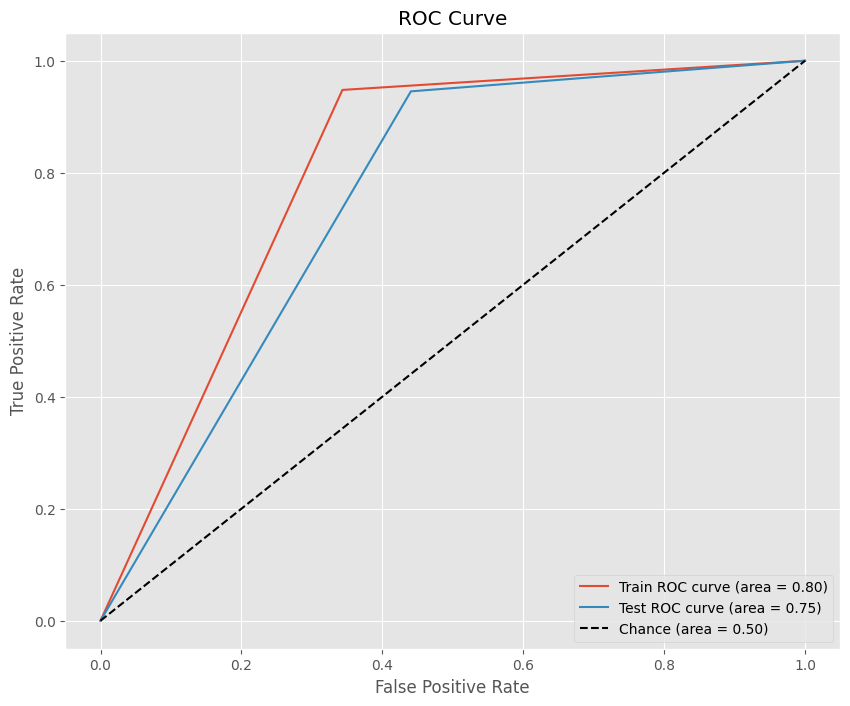

Train AUC: 0.80
Test AUC: 0.75


In [89]:
train_auc, test_auc = calculate_roc_auc(nb_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")


In [90]:
y_pred = nb_tfidf.predict(X_test_tfidf)
y_pred_proba= nb_tfidf.predict_proba(X_test_tfidf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [99]:
svm_count = SVC(probability=True) # By setting probability=True, it allow the SVM classifier to provide probability estimates,
                                  # which are required for ROC and AUC calculations.


svm_count.fit(X_train_count, y_train)

SVC(probability=True)

In [100]:
svm_count_scores= eval_scores(svm_count, X_train_count, y_train)
print(svm_count_scores)

fit_time           157.376239
score_time          14.547388
test_precision       0.934780
train_precision      0.997347
test_recall          0.916155
train_recall         0.956485
test_f1              0.925365
train_f1             0.976488
test_roc_auc         0.919973
train_roc_auc        0.993589
dtype: float64


In [102]:
eval_metric(svm_count, X_train_count, y_train, X_test_count, y_test)

Test_Set
[[ 349  366]
 [  88 3130]]
              precision    recall  f1-score   support

           0       0.80      0.49      0.61       715
           1       0.90      0.97      0.93      3218

    accuracy                           0.88      3933
   macro avg       0.85      0.73      0.77      3933
weighted avg       0.88      0.88      0.87      3933


Train_Set
[[ 2387   473]
 [   96 12773]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2860
           1       0.96      0.99      0.98     12869

    accuracy                           0.96     15729
   macro avg       0.96      0.91      0.94     15729
weighted avg       0.96      0.96      0.96     15729



Recall scores on class 0 on the test dataset is very low, and high on the training dataset, which indicates there is an overfitting. We will try to address the problem with halving grid search if the problem still presist with tf_idf model.

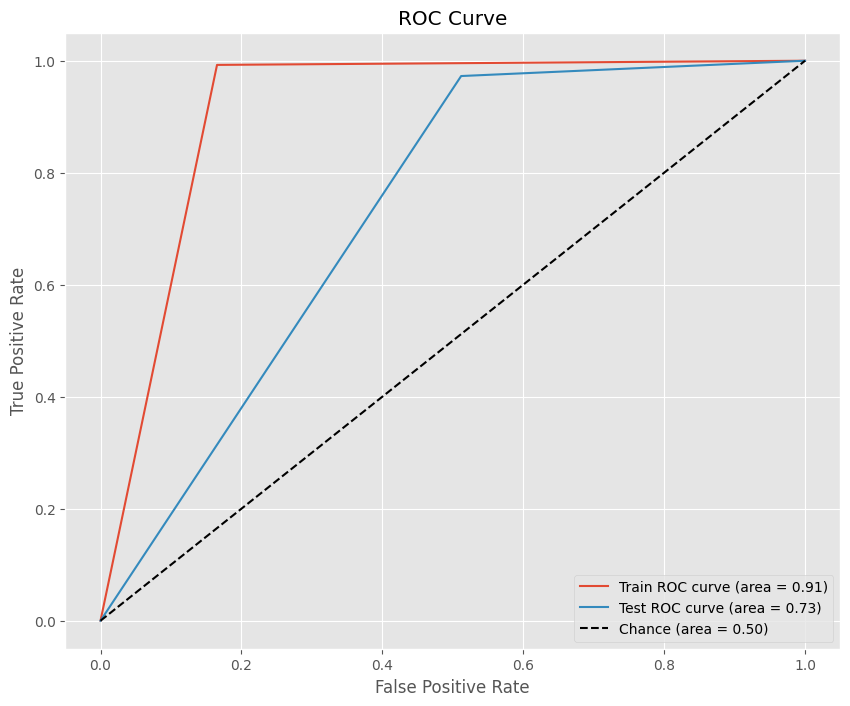

Train AUC: 0.91
Test AUC: 0.73


In [103]:
train_auc, test_auc = calculate_roc_auc(svm_count, X_train_count, y_train, X_test_count, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")


### TD-IDF

In [104]:
svm_tfidf = SVC(probability=True) # By setting probability=True, it allow the SVM classifier to provide probability estimates,
                                  # which are required for ROC and AUC calculations.


svm_tfidf.fit(X_train_tfidf, y_train)

SVC(probability=True)

In [106]:
svm_tfidf_scores= eval_scores(svm_tfidf, X_train_tfidf, y_train)
print(svm_tfidf_scores)

fit_time           285.511368
score_time          24.603454
test_precision       0.939240
train_precision      0.999880
test_recall          0.927189
train_recall         0.970860
test_f1              0.933171
train_f1             0.985156
test_roc_auc         0.933268
train_roc_auc        0.998660
dtype: float64


In [107]:
eval_metric(svm_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)

Test_Set
[[ 396  319]
 [  96 3122]]
              precision    recall  f1-score   support

           0       0.80      0.55      0.66       715
           1       0.91      0.97      0.94      3218

    accuracy                           0.89      3933
   macro avg       0.86      0.76      0.80      3933
weighted avg       0.89      0.89      0.89      3933


Train_Set
[[ 2585   275]
 [   70 12799]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      2860
           1       0.98      0.99      0.99     12869

    accuracy                           0.98     15729
   macro avg       0.98      0.95      0.96     15729
weighted avg       0.98      0.98      0.98     15729



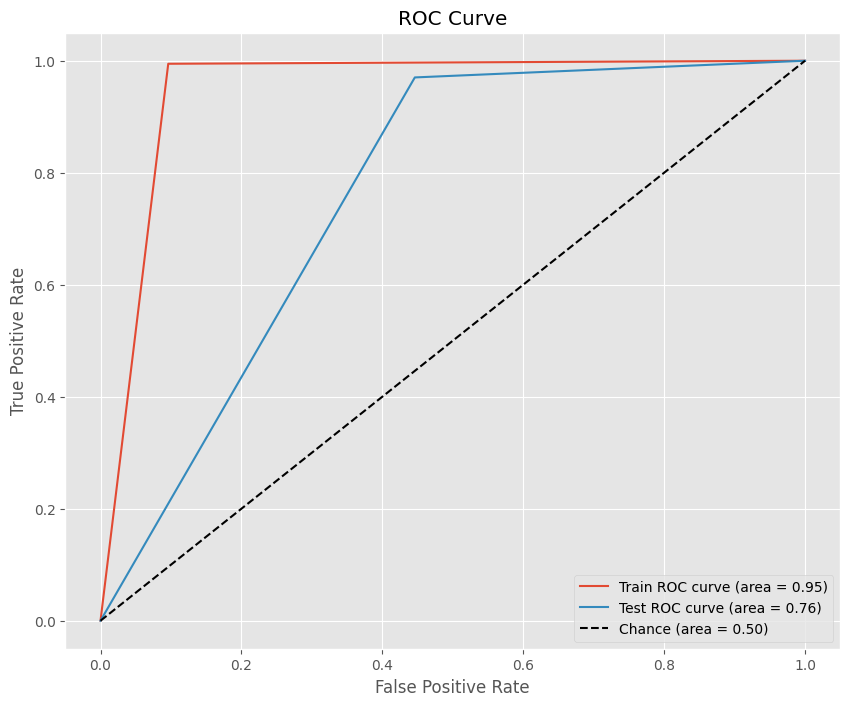

Train AUC: 0.95
Test AUC: 0.76


In [108]:
train_auc, test_auc = calculate_roc_auc(svm_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")


In [117]:
y_pred = svm_tfidf.predict(X_test_tfidf)
decision_function= svm_tfidf.decision_function(X_test_tfidf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

In [109]:
svc_count1 = SVC(C=1.0,
             kernel='linear',
             class_weight='balanced',
             probability=True,
             random_state=111)
svc_count1 .fit(X_train_count, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True,
    random_state=111)

In [111]:
svc_count1_scores= eval_scores(svc_count1, X_train_count, y_train)
print(svc_count1_scores)

fit_time           133.180487
score_time           5.950291
test_precision       0.930634
train_precision      0.996566
test_recall          0.875359
train_recall         0.941390
test_f1              0.902135
train_f1             0.968191
test_roc_auc         0.875616
train_roc_auc        0.983237
dtype: float64


In [112]:
eval_metric(svc_count1, X_train_count, y_train, X_test_count, y_test)

Test_Set
[[ 528  187]
 [ 375 2843]]
              precision    recall  f1-score   support

           0       0.58      0.74      0.65       715
           1       0.94      0.88      0.91      3218

    accuracy                           0.86      3933
   macro avg       0.76      0.81      0.78      3933
weighted avg       0.87      0.86      0.86      3933


Train_Set
[[ 2799    61]
 [  915 11954]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      2860
           1       0.99      0.93      0.96     12869

    accuracy                           0.94     15729
   macro avg       0.87      0.95      0.91     15729
weighted avg       0.95      0.94      0.94     15729



In [116]:
y_pred = svc_count1.predict(X_test_count)
decision_function= svc_count1.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [118]:
rf_count = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [120]:
rf_count_scores= eval_scores(rf_count, X_train_count, y_train)
print(rf_count_scores)

fit_time           11.035697
score_time          0.267245
test_precision      0.862956
train_precision     1.000000
test_recall         0.985702
train_recall        1.000000
test_f1             0.920242
train_f1            1.000000
test_roc_auc        0.908423
train_roc_auc       1.000000
dtype: float64


In [121]:
eval_metric(rf_count, X_train_count, y_train, X_test_count, y_test)

Test_Set
[[ 207  508]
 [  47 3171]]
              precision    recall  f1-score   support

           0       0.81      0.29      0.43       715
           1       0.86      0.99      0.92      3218

    accuracy                           0.86      3933
   macro avg       0.84      0.64      0.67      3933
weighted avg       0.85      0.86      0.83      3933


Train_Set
[[ 2860     0]
 [    0 12869]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2860
           1       1.00      1.00      1.00     12869

    accuracy                           1.00     15729
   macro avg       1.00      1.00      1.00     15729
weighted avg       1.00      1.00      1.00     15729



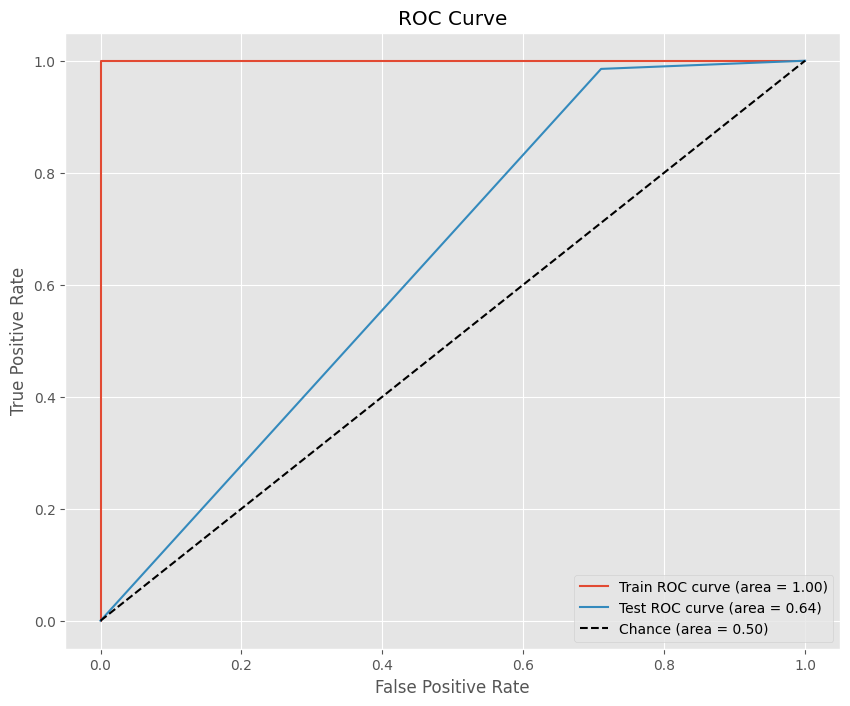

Train AUC: 1.00
Test AUC: 0.64


In [122]:
train_auc, test_auc = calculate_roc_auc(rf_count, X_train_count, y_train, X_test_count, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")


In [127]:
#  parameter grid
param_grid = {
    'n_estimators': [100, 300],  # number of trees
    'max_depth': [10, 20, 30],  # limiting the depth to prevent overfitting, in previous grid searched i encouterd overfitting
    'min_samples_split': [20, 40],
    'min_samples_leaf': [10, 20],  # higher to ensure the model is not too sensitive to the training data
    'class_weight': ['balanced'],
}


halving_grid_search = HalvingGridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',  # recall did not return good scores
    factor=2,
    resource='n_samples',
    max_resources='auto',
    min_resources='smallest',  # Start with a small amount of resources
    cv=5,
    n_jobs=-1,
    verbose=1
)

# fitting the HalvingGridSearchCV object to the training data
halving_grid_search.fit(X_train_count, y_train)

# Get the best estimator and its parameters
best_rf = halving_grid_search.best_estimator_
best_params = halving_grid_search.best_params_
print(f"Best parameters: {best_params}")

print("Test dataset")
y_test_pred = best_rf.predict(X_test_count)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

print("Train dataset")
y_train_pred = best_rf.predict(X_train_count)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 10
min_resources_: 20
max_resources_: 15729
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 24
n_resources: 20
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 1
n_candidates: 12
n_resources: 40
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 2
n_candidates: 6
n_resources: 80
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 3
n_resources: 160
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 320
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 40, 'n_estimators': 300}
Test dataset
[[ 597  118]
 [ 563 2655]]
              precision    recall  f1-score   support

           0       0.51      0.83      0.64       715
        

In [128]:
y_pred = best_rf.predict(X_test_count)
y_pred_proba= best_rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [129]:
rf_tfidf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [130]:
rf_tfidf_scores= eval_scores(rf_tfidf, X_train_tfidf, y_train)
print(rf_tfidf_scores)

fit_time           16.167916
score_time          0.275805
test_precision      0.838842
train_precision     1.000000
test_recall         0.994172
train_recall        1.000000
test_f1             0.909925
train_f1            1.000000
test_roc_auc        0.913109
train_roc_auc       1.000000
dtype: float64


In [131]:
eval_metric(rf_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)

Test_Set
[[ 101  614]
 [  19 3199]]
              precision    recall  f1-score   support

           0       0.84      0.14      0.24       715
           1       0.84      0.99      0.91      3218

    accuracy                           0.84      3933
   macro avg       0.84      0.57      0.58      3933
weighted avg       0.84      0.84      0.79      3933


Train_Set
[[ 2860     0]
 [    0 12869]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2860
           1       1.00      1.00      1.00     12869

    accuracy                           1.00     15729
   macro avg       1.00      1.00      1.00     15729
weighted avg       1.00      1.00      1.00     15729



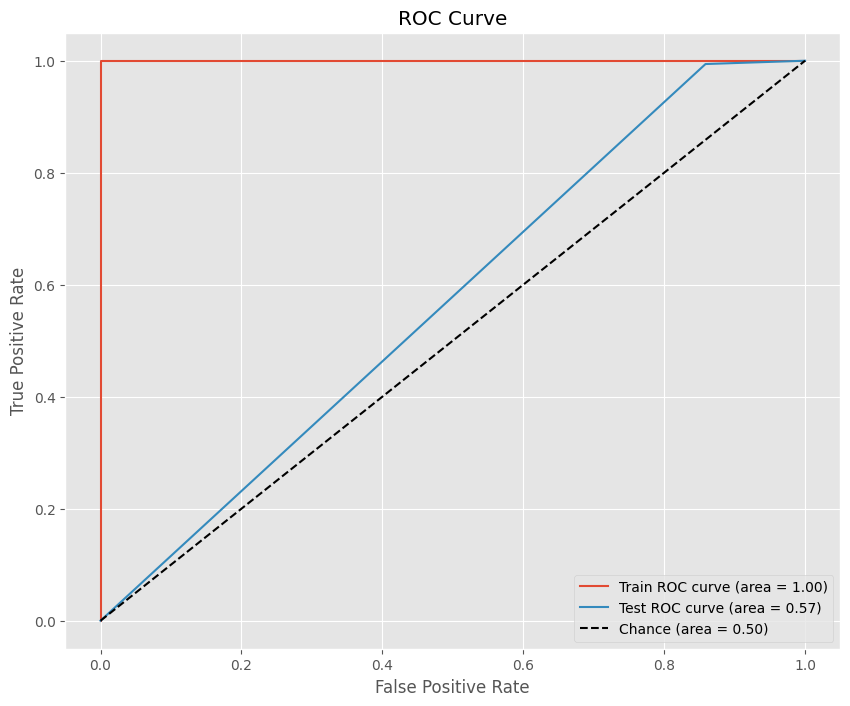

Train AUC: 1.00
Test AUC: 0.57


In [132]:
train_auc, test_auc = calculate_roc_auc(rf_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")

In [135]:
# parameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20, 30],  # limiting the depth to prevent overfitting
    'min_samples_split': [20, 40],
    'min_samples_leaf': [10, 20],
    'class_weight': ['balanced'],
}


halving_grid_search = HalvingGridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',  # using recall returned good results, but f1 score were slighlty better
    factor=2,
    resource='n_samples',
    max_resources='auto',
    min_resources='smallest',
    cv=5,
    n_jobs=-1,
    verbose=1
)


halving_grid_search.fit(X_train_tfidf, y_train)

# Get the best estimator and its parameters
best_rf = halving_grid_search.best_estimator_
best_params = halving_grid_search.best_params_
print(f"Best parameters: {best_params}")

print("Test dataset")
y_test_pred = best_rf.predict(X_test_tfidf)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

print("Train dataset")
y_train_pred = best_rf.predict(X_train_tfidf)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 10
min_resources_: 20
max_resources_: 15729
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 24
n_resources: 20
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 1
n_candidates: 12
n_resources: 40
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 2
n_candidates: 6
n_resources: 80
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 3
n_resources: 160
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 320
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 20, 'min_samples_split': 40, 'n_estimators': 300}
Test dataset
[[ 580  135]
 [ 479 2739]]
              precision    recall  f1-score   support

           0       0.55      0.81      0.65       715
        

In [136]:
y_pred = best_rf.predict(X_test_tfidf)
y_pred_proba= best_rf.predict_proba(X_test_tfidf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [138]:
ada_count = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)


ada_count.fit(X_train_count, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1),
                   n_estimators=100, random_state=42)

In [139]:
ada_count_scores= eval_scores(ada_count, X_train_count, y_train)
print(ada_count_scores)

fit_time           3.626072
score_time         0.798162
test_precision     0.946669
train_precision    0.955715
test_recall        0.839614
train_recall       0.841810
test_f1            0.889918
train_f1           0.895150
test_roc_auc       0.885342
train_roc_auc      0.911589
dtype: float64


In [140]:
eval_metric(ada_count, X_train_count, y_train, X_test_count, y_test)

Test_Set
[[ 553  162]
 [ 557 2661]]
              precision    recall  f1-score   support

           0       0.50      0.77      0.61       715
           1       0.94      0.83      0.88      3218

    accuracy                           0.82      3933
   macro avg       0.72      0.80      0.74      3933
weighted avg       0.86      0.82      0.83      3933


Train_Set
[[ 2357   503]
 [ 2056 10813]]
              precision    recall  f1-score   support

           0       0.53      0.82      0.65      2860
           1       0.96      0.84      0.89     12869

    accuracy                           0.84     15729
   macro avg       0.74      0.83      0.77     15729
weighted avg       0.88      0.84      0.85     15729



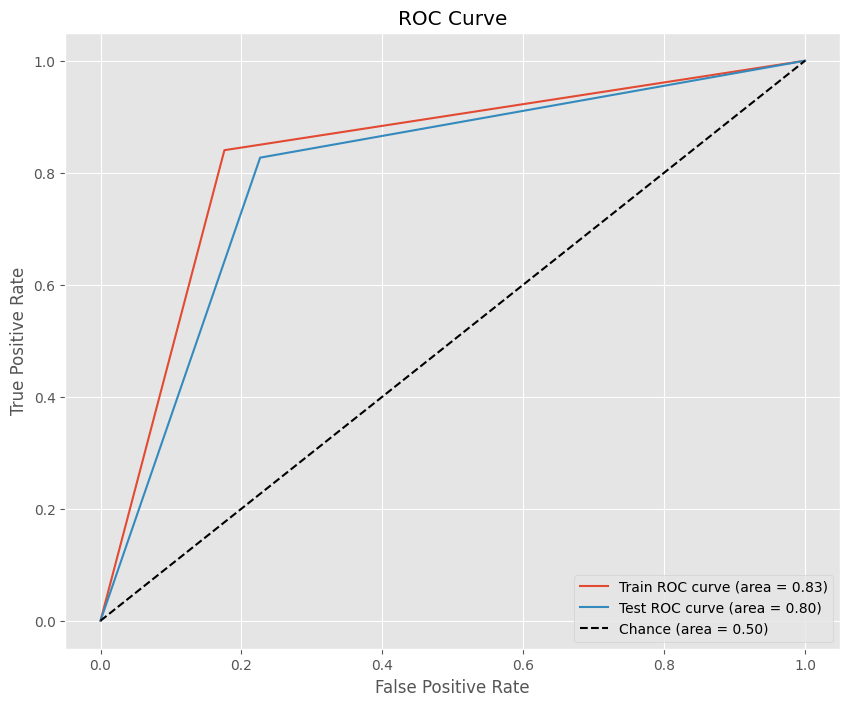

Train AUC: 0.83
Test AUC: 0.80


In [141]:
train_auc, test_auc = calculate_roc_auc(ada_count, X_train_count, y_train, X_test_count, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")


In [142]:
y_pred = ada_count.predict(X_test_count)
y_pred_proba= ada_count.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [143]:
ada_tfidf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)


ada_tfidf.fit(X_train_tfidf, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1),
                   n_estimators=100, random_state=42)

In [144]:
ada_tfidf_scores= eval_scores(ada_tfidf, X_train_tfidf, y_train)
print(ada_tfidf_scores)

fit_time           22.956520
score_time          0.279349
test_precision      0.944624
train_precision     0.960607
test_recall         0.836973
train_recall        0.848434
test_f1             0.887485
train_f1            0.901040
test_roc_auc        0.888199
train_roc_auc       0.926782
dtype: float64


In [145]:
eval_metric(ada_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)

Test_Set
[[ 563  152]
 [ 534 2684]]
              precision    recall  f1-score   support

           0       0.51      0.79      0.62       715
           1       0.95      0.83      0.89      3218

    accuracy                           0.83      3933
   macro avg       0.73      0.81      0.75      3933
weighted avg       0.87      0.83      0.84      3933


Train_Set
[[ 2400   460]
 [ 1989 10880]]
              precision    recall  f1-score   support

           0       0.55      0.84      0.66      2860
           1       0.96      0.85      0.90     12869

    accuracy                           0.84     15729
   macro avg       0.75      0.84      0.78     15729
weighted avg       0.88      0.84      0.86     15729



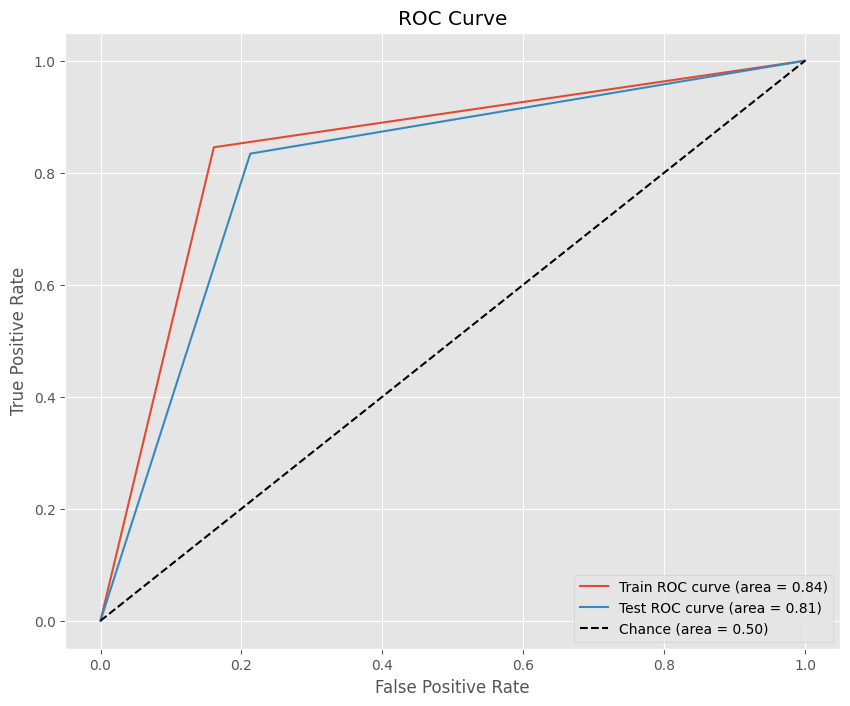

Train AUC: 0.84
Test AUC: 0.81


In [146]:
train_auc, test_auc = calculate_roc_auc(ada_tfidf, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")


In [147]:
y_pred = ada_tfidf.predict(X_test_tfidf)
y_pred_proba= ada_tfidf.predict_proba(X_test_tfidf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [148]:
# Setting paramaters for DL modeling
vocab_size = 15001
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'  # Out-of-vocabulary token


In [149]:
X2= df2['Review Text']
y2= df2['Recommended IND']

### Tokenization

In [150]:
#num_words = 10001 # we add 1.

tokenizer = Tokenizer(num_words=vocab_size)

In [152]:
tokenizer.fit_on_texts(X2)

### Creating word index

In [153]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'size': 21,
 'love': 22,
 'have': 23,
 'very': 24,
 'fit': 25,
 'top': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'too': 34,
 'great': 35,
 'or': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'at': 43,
 'up': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'one': 55,
 'these': 56,
 'will': 57,
 'flattering': 58,
 'an': 59,
 'well': 60,
 'out': 61,
 'soft': 62,
 '\r': 63,
 'back': 64,
 'because': 65,
 'had': 66,
 'can': 67,
 'nice': 68,
 'comfortable': 69,
 'bought': 70,
 'all': 71,
 'than': 72,
 'when': 73,
 'cute': 74,
 'bit': 75,
 'looks': 76,
 'fits': 77,
 'which': 78,
 'large': 79,
 'b

In [154]:
len(tokenizer.word_index)

14244

### Converting tokens to numeric

In [155]:
token_to_num = tokenizer.texts_to_sequences(X2)
#padded = pad_sequences(token_to_num, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [156]:
X2.iloc[:1]

2    I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
Name: Review Text, dtype: object

In [157]:
token_to_num[:1]

[[2,
  66,
  315,
  178,
  1086,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1170,
  52,
  1,
  91,
  46,
  17,
  234,
  21,
  10,
  2,
  221,
  7,
  8,
  29,
  6424,
  46,
  16,
  46,
  9,
  639,
  20,
  2,
  118,
  19,
  804,
  5,
  44,
  2,
  2152,
  5,
  9,
  91,
  96,
  78,
  15,
  39,
  629,
  251,
  1,
  26,
  653,
  15,
  69,
  3,
  25,
  255,
  10,
  1,
  173,
  653,
  66,
  4,
  24,
  148,
  275,
  467,
  3,
  521,
  736,
  499,
  4399,
  152,
  970,
  1892,
  4,
  1954,
  142,
  1654,
  15,
  1,
  4399,
  152,
  467,
  822,
  3128,
  308,
  1,
  466,
  5,
  673]]

In [158]:
tokenizer.word_index["dress"]

18

In [159]:
tokenizer.word_index["small"]

46

### Maximum and Minimum number of tokens for all documents¶

In [160]:
# calculating the length of each sequence (number of tokens in each document)
num_tokens = [len(sequence) for sequence in token_to_num]

# converting the list of token counts to a numpy array
num_tokens = np.array(num_tokens)


In [161]:
num_tokens

array([97, 22, 36, ..., 42, 85, 19])

In [162]:
num_tokens.mean()

62.55055436883328

In [163]:
num_tokens.max()


115

In [164]:
max_tokens = 115 # setting 115 as the maximum number of tokens

In [165]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

In [166]:
#index of the largest sentence in the num_tokens array
num_tokens.argmax()

4802

In [167]:
X2.iloc[4802]

"I love shift dresses and i love t linen so this one was a must for me. i had it in my inbox as soon as it came out on the website and then i found it in the store and had to try it on. i took the six and the eight to the fitting room because i run in between, and the six fit better so i guess it runs a little bit large. really it just depends on how you want it to fit. the length is great too, about 3 inches above my knee, i'm 5 foot 5, which is exactly where i like my dresses to hit. i got the"

In [168]:
len(X2.iloc[4802] ) # It has 499 letters

499

In [169]:
# finding index of the shortest sentence
num_tokens.argmin()

1348

In [170]:
X2.iloc[1348]

'Beautiful colors'

In [171]:
len(X2.iloc[1348]) # sentence has 16 letters

16

In [172]:
sum(num_tokens < max_tokens) # Number of documents which have 115 or less tokens

19661

In [173]:
len(num_tokens)

19662

### Fixing token counts of all documents (pad_sequences)

In [174]:
X_pad_sequences = pad_sequences(token_to_num,
                      maxlen = max_tokens)

In [175]:
X_pad_sequences.shape

(19662, 115)

### Train Set Split

In [176]:
# spliting dataset into training and (temporary) test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_pad_sequences, y2, test_size=0.3, random_state=42)

# split the (temporary) test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Modeling

In [177]:
vocab_size = 15001
embedding_dim = 60
max_length = max_tokens      #  max token length was set to 115
#gru_units = 64       # Number of units in GRU layer
optimizer = Adam(learning_rate=0.001)



In [178]:

model = Sequential()


model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_length))


model.add(GRU(units=60, return_sequences=True))
model.add(Dropout(0.2))


model.add(GRU(units=32, return_sequences=True))
model.add(Dropout(0.2))


model.add(GRU(units=16, return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])



In [179]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 115, 60)           900060    
                                                                 
 gru (GRU)                   (None, 115, 60)           21960     
                                                                 
 dropout (Dropout)           (None, 115, 60)           0         
                                                                 
 gru_1 (GRU)                 (None, 115, 32)           9024      
                                                                 
 dropout_1 (Dropout)         (None, 115, 32)           0         
                                                                 
 gru_2 (GRU)                 (None, 16)                2400      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

In [180]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)

In [181]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.60914402, 2.7905515 ])

In [182]:
batch_size = 64
epochs = 10

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    sample_weight=classes_weights,
    callbacks=[early_stop],
    batch_size=batch_size,
    verbose=1
)





Epoch 1/10
216/216 [==============================] - 37s 150ms/step - loss: 0.5150 - recall: 0.7587 - val_loss: 0.3493 - val_recall: 0.8423
Epoch 2/10
216/216 [==============================] - 33s 154ms/step - loss: 0.3013 - recall: 0.8598 - val_loss: 0.3555 - val_recall: 0.8348
Epoch 3/10
216/216 [==============================] - 30s 139ms/step - loss: 0.2234 - recall: 0.8979 - val_loss: 0.3425 - val_recall: 0.8742
Epoch 4/10
216/216 [==============================] - 30s 138ms/step - loss: 0.1575 - recall: 0.9314 - val_loss: 0.3819 - val_recall: 0.8904
Epoch 5/10
216/216 [==============================] - 31s 143ms/step - loss: 0.1216 - recall: 0.9501 - val_loss: 0.3942 - val_recall: 0.8834
Epoch 6/10
216/216 [==============================] - 32s 146ms/step - loss: 0.1128 - recall: 0.9530 - val_loss: 0.4764 - val_recall: 0.8423
Epoch 6: early stopping


### Model Evaluation

In [183]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.514952,0.758697,0.349349,0.842258
1,0.301321,0.859786,0.355529,0.834786
2,0.223380,0.897937,0.342453,0.874222
3,0.157509,0.931398,0.381938,0.890411
4,0.121620,0.950075,0.394196,0.883354


from matplotlib import pyplot as plt
_df_0['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['val_recall'].plot(kind='hist', bins=20, title='val_recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='loss', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='recall', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='val_loss', y='val_recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['recall']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('recall', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('recall')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['recall']
  ys = series['val_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('recall', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('recall')
_ = plt.ylabel('val_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['recall']
  ys = series['val_recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('recall', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('recall')
_ = plt.ylabel('val_recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['recall']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'recall'}, axis=1)
              .sort_values('recall', ascending=True))
  xs = counted['recall']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('recall', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('recall')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['val_recall'].plot(kind='line', figsize=(8, 4), title='val_recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='index', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='loss', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='recall', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='val_loss', y='val_recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['val_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('val_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['val_recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('val_recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_27['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

In [184]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

93/93 - 2s - loss: 0.3801 - recall: 0.8883 - 2s/epoch - 26ms/step
Test Loss: 0.38005006313323975
Test Accuracy: 0.8882822394371033


<Axes: >

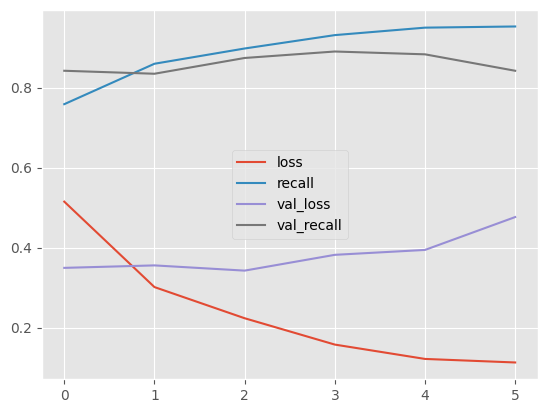

In [185]:
model_loss.plot()

In [186]:
# predictions for the training set
y_train_pred = model.predict(X_train, batch_size=batch_size)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# predictions for the test set
y_test_pred = model.predict(X_test, batch_size=batch_size)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

47/47 [==============================] - 2s 36ms/step


In [187]:

print("Training Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_binary))
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred_binary))

print("\nTest Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_binary))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred_binary))


Training Set Confusion Matrix:
[[ 2442    24]
 [  565 10732]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2466
           1       1.00      0.95      0.97     11297

    accuracy                           0.96     13763
   macro avg       0.90      0.97      0.93     13763
weighted avg       0.96      0.96      0.96     13763


Test Set Confusion Matrix:
[[ 441  128]
 [ 266 2115]]

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       569
           1       0.94      0.89      0.91      2381

    accuracy                           0.87      2950
   macro avg       0.78      0.83      0.80      2950
weighted avg       0.88      0.87      0.87      2950



In [190]:
#average_precision_score(y_test, y_pred_proba)


93/93 [==============================] - 3s 29ms/step


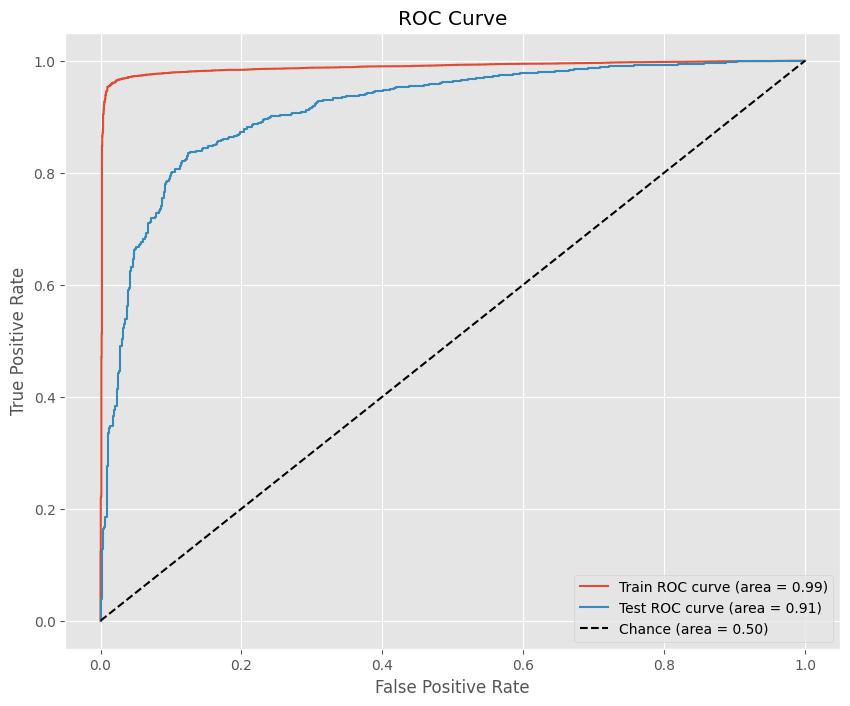

Train AUC: 0.99
Test AUC: 0.91


In [191]:
train_auc, test_auc = calculate_roc_auc(model, X_train, y_train, X_test, y_test)
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")

93/93 [==============================] - 3s 27ms/step


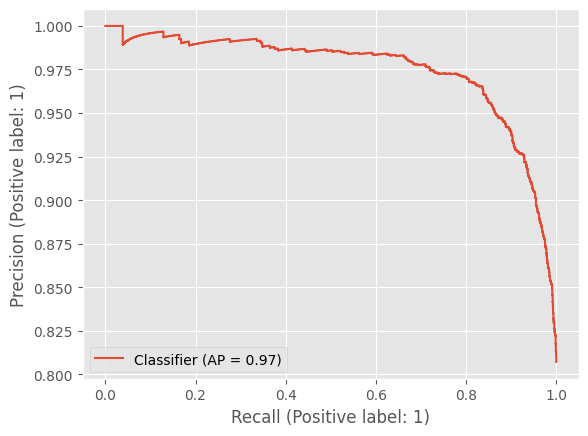

In [192]:
y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


In [198]:
threshold = 0.5
y_pred_binary = (y_pred_proba >= threshold).astype(int)

GRU_AP = average_precision_score(y_test, y_pred_proba)
GRU_f1 = f1_score(y_test, y_pred_binary)
GRU_rec = recall_score(y_test, y_pred_binary)
GRU_roc_auc = roc_auc_score(y_test, y_pred_proba)


## BERT Modeling

In [199]:
!pip install transformers

In [200]:
pip install tf-models-official

In [201]:
from transformers import BertTokenizerFast, TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from official.nlp import optimization  # optimizer AdamW

### Read Data

In [202]:
df= pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses


In [223]:
#X= df['Review Text']
#y= df['Recommended IND']

X = df['Review Text'].astype(str)
y = df['Recommended IND']


In [224]:
df = df.dropna(subset=['Review Text'])

# Convert 'Review Text' to string
df.loc[:, 'Review Text'] = df['Review Text'].astype(str)

### Train test split

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  stratify=y, random_state=42)

In [226]:
print(type(X_train))
print(isinstance(X_train[0], str))

<class 'pandas.core.series.Series'>
True


### Tokenization

In [216]:
# Initialize the tokenizer
#tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')



### Fixing token counts of all documents

In [227]:
from transformers import BertTokenizer



tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to encode text data into BERT's format
def bert_encode(data, tokenizer, max_len=160):
        tokens = tokenizer.batch_encode_plus(
        data,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='np'
    )
    return tokens['input_ids'], tokens['attention_mask']

# Encode the training and testing data
train_input_ids, train_attention_masks = bert_encode(X_train, tokenizer, max_len=160)
test_input_ids, test_attention_masks = bert_encode(X_test, tokenizer, max_len=160)


### Transformation Vectors to Matrices

> Indented block



In [228]:
# Convert the labels to numpy arrays
train_labels = y_train.values.reshape(-1, 1)
test_labels = y_test.values.reshape(-1, 1)


In [229]:
print("Train input_ids shape:", train_input_ids.shape)
print("Train attention_masks shape:", train_attention_masks.shape)
print("Train labels shape:", train_labels.shape)

print("Test input_ids shape:", test_input_ids.shape)
print("Test attention_masks shape:", test_attention_masks.shape)
print("Test labels shape:", test_labels.shape)

Train input_ids shape: (18112, 160)
Train attention_masks shape: (18112, 160)
Train labels shape: (18112, 1)
Test input_ids shape: (4529, 160)
Test attention_masks shape: (4529, 160)
Test labels shape: (4529, 1)


### Transformation Matrix to Tensorflow tensor

In [230]:
# TensorFlow dataset preparation
train_dataset = tf.data.Dataset.from_tensor_slices((train_input_ids, train_attention_masks, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_input_ids, test_attention_masks, test_labels))

In [231]:
# Function to map the tokenized data to TensorFlow format
def map_to_dict(input_ids, attention_masks, labels):
    return {'input_ids': input_ids, 'attention_masks': attention_masks}, labels

# Applying the function to the datasets
train_dataset = train_dataset.map(map_to_dict)
test_dataset = test_dataset.map(map_to_dict)



### Batch Size

In [232]:


# Set batch size and convert to batch format
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)



### Creating optimization

In [233]:
# Optimizer and model configuration
epochs = 2
steps_per_epoch = len(train_dataset)
total_train_steps = steps_per_epoch * epochs
warmup_steps = int(0.1 * total_train_steps)
learning_rate = 2e-5

# the optimizer
bert_optimizer = optimization.create_optimizer(
    init_lr=learning_rate,
    num_train_steps=total_train_steps,
    num_warmup_steps=warmup_steps,
    optimizer_type='adamw'
)





### Creating Model with TPU

In [239]:

def build_bert_classifier():
    # defining the input layers
    input_ids_layer = Input(shape=(160,), dtype='int32', name='input_ids')
    attention_masks_layer = Input(shape=(160,), dtype='int32', name='attention_masks')

    # defining bert model
    bert_layer = TFBertModel.from_pretrained('bert-base-uncased')
    bert_output = bert_layer(input_ids_layer, attention_mask=attention_masks_layer).pooler_output

    # defining classifier layers
    hidden_layer = Dense(units=80, activation='relu')(bert_output)
    hidden_layer = BatchNormalization()(hidden_layer)
    hidden_layer = Dropout(0.2)(hidden_layer)
    output_layer = Dense(units=1, activation='sigmoid')(hidden_layer)


    classifier = Model(inputs=[input_ids_layer, attention_masks_layer], outputs=output_layer)
    return classifier






In [240]:

strategy = tf.distribute.get_strategy()
with strategy.scope():
    bert_classifier = build_bert_classifier()
    bert_classifier.compile(
        optimizer=bert_optimizer,
        loss='binary_crossentropy',
        metrics=['Recall']
    )


bert_classifier.summary()



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 160)]                0         []                            
                                                                                                  
 attention_masks (InputLaye  [(None, 160)]                0         []                            
 r)                                                                                               
                                                                                                  
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   40         'attention_masks[0][0]']     
                             hidden_state=(None, 160, 7                                     

### Model Fiting

In [241]:


bert_classifier.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset
)


Epoch 1/2
566/566 [==============================] - 6223s 11s/step - loss: 0.4468 - recall: 0.8871 - val_loss: 0.5703 - val_recall: 0.9070
Epoch 2/2
566/566 [==============================] - 6301s 11s/step - loss: 0.2801 - recall: 0.9595 - val_loss: 0.4508 - val_recall: 0.9442


### Model evaluation

In [242]:
print("Evaluation:")
bert_classifier.evaluate(test_dataset)


Evaluation:
142/142 [==============================] - 457s 3s/step - loss: 0.4508 - recall: 0.9442


[0.4508029818534851, 0.9441897869110107]

In [243]:
model_loss = pd.DataFrame(history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.514952,0.758697,0.349349,0.842258
1,0.301321,0.859786,0.355529,0.834786
2,0.223380,0.897937,0.342453,0.874222
3,0.157509,0.931398,0.381938,0.890411
4,0.121620,0.950075,0.394196,0.883354


<Axes: >

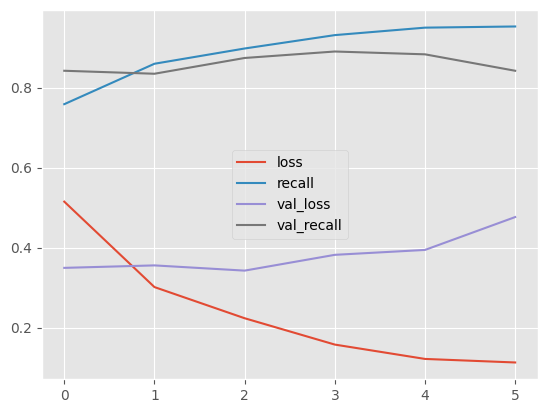

In [244]:
model_loss.plot()

In [245]:
# predictions for the training set
y_train_pred = bert_classifier.predict(train_dataset) >= 0.5
#print(classification_report(X_test, y_train_pred))
print("Training Set Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))



# predictions for the test set
y_test_pred = bert_classifier.predict(test_dataset) >= 0.5
#print(classification_report(y_test, y_test_pred))
print("\nTest Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


566/566 [==============================] - 1847s 3s/step
Training Set Confusion Matrix:
[[ 2880   401]
 [  360 14471]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3281
           1       0.97      0.98      0.97     14831

    accuracy                           0.96     18112
   macro avg       0.93      0.93      0.93     18112
weighted avg       0.96      0.96      0.96     18112

142/142 [==============================] - 457s 3s/step

Test Set Confusion Matrix:
[[ 645  175]
 [ 207 3502]]

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       820
           1       0.95      0.94      0.95      3709

    accuracy                           0.92      4529
   macro avg       0.85      0.87      0.86      4529
weighted avg       0.92      0.92      0.92      4529



142/142 [==============================] - 459s 3s/step


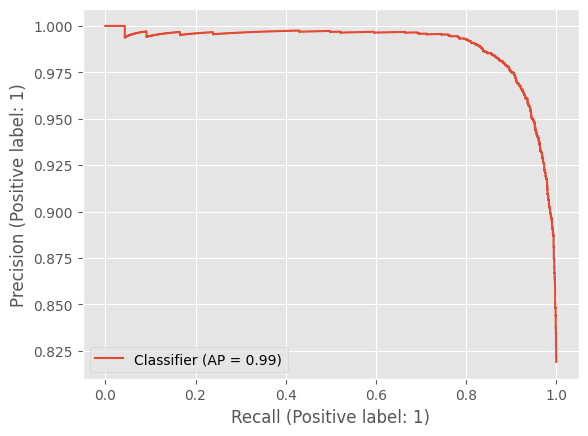

In [247]:
y_pred_proba = bert_classifier.predict(test_dataset)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [249]:

print(len(y_test), len(y_pred_proba))


4529 4529


In [250]:
average_precision = average_precision_score(y_test, y_pred_proba)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.99


In [285]:
threshold = 0.5
y_pred_binary = [1 if prob >= threshold else 0 for prob in y_pred_proba]

BERT_AP = average_precision_score(y_test, y_pred_proba)
BERT_f1 = f1_score(y_test, y_pred_binary)
BERT_rec = recall_score(y_test, y_pred_binary)

### Predictions

In [277]:
test_sentences = [
    "This is a great product!",
    "I hate this shirt",
    "I think the color looks good, but not sure about the quality of the fabric"
]

# Tokenize all sentences
encoded_inputs = [tokenizer.encode_plus(
    sentence,
    truncation=True,
    padding='max_length',
    max_length=160,
    return_tensors="tf"
) for sentence in test_sentences]

input_ids = tf.concat([encoded_input['input_ids'] for encoded_input in encoded_inputs], axis=0)
attention_masks = tf.concat([encoded_input['attention_mask'] for encoded_input in encoded_inputs], axis=0)

tf_outputs = bert_classifier.predict([input_ids, attention_masks])

tf_predictions = tf.sigmoid(tf_outputs)


labels = ['Negative', 'Positive']  # (0: Negative, 1: Positive)


for i, prediction in enumerate(tf_predictions):
    predicted_label_index = int(prediction >= 0.5)
    predicted_label = labels[predicted_label_index]
    print(f"Sentence: '{test_sentences[i]}'")
    print(f"Predicted class: {predicted_label}")
    print(f"Predicted probability of being Positive: {prediction.numpy()[0]:.4f}\n")


1/1 [==============================] - 0s 486ms/step
Sentence: 'This is a great product!'
Predicted class: Positive
Predicted probability of being Positive: 0.7212

Sentence: 'I hate this shirt'
Predicted class: Positive
Predicted probability of being Positive: 0.5000

Sentence: 'I think the color looks good, but not sure about the quality of the fabric'
Predicted class: Positive
Predicted probability of being Positive: 0.7004



### Compare Models F1 Scores, Recall Scores and Average Precision Score

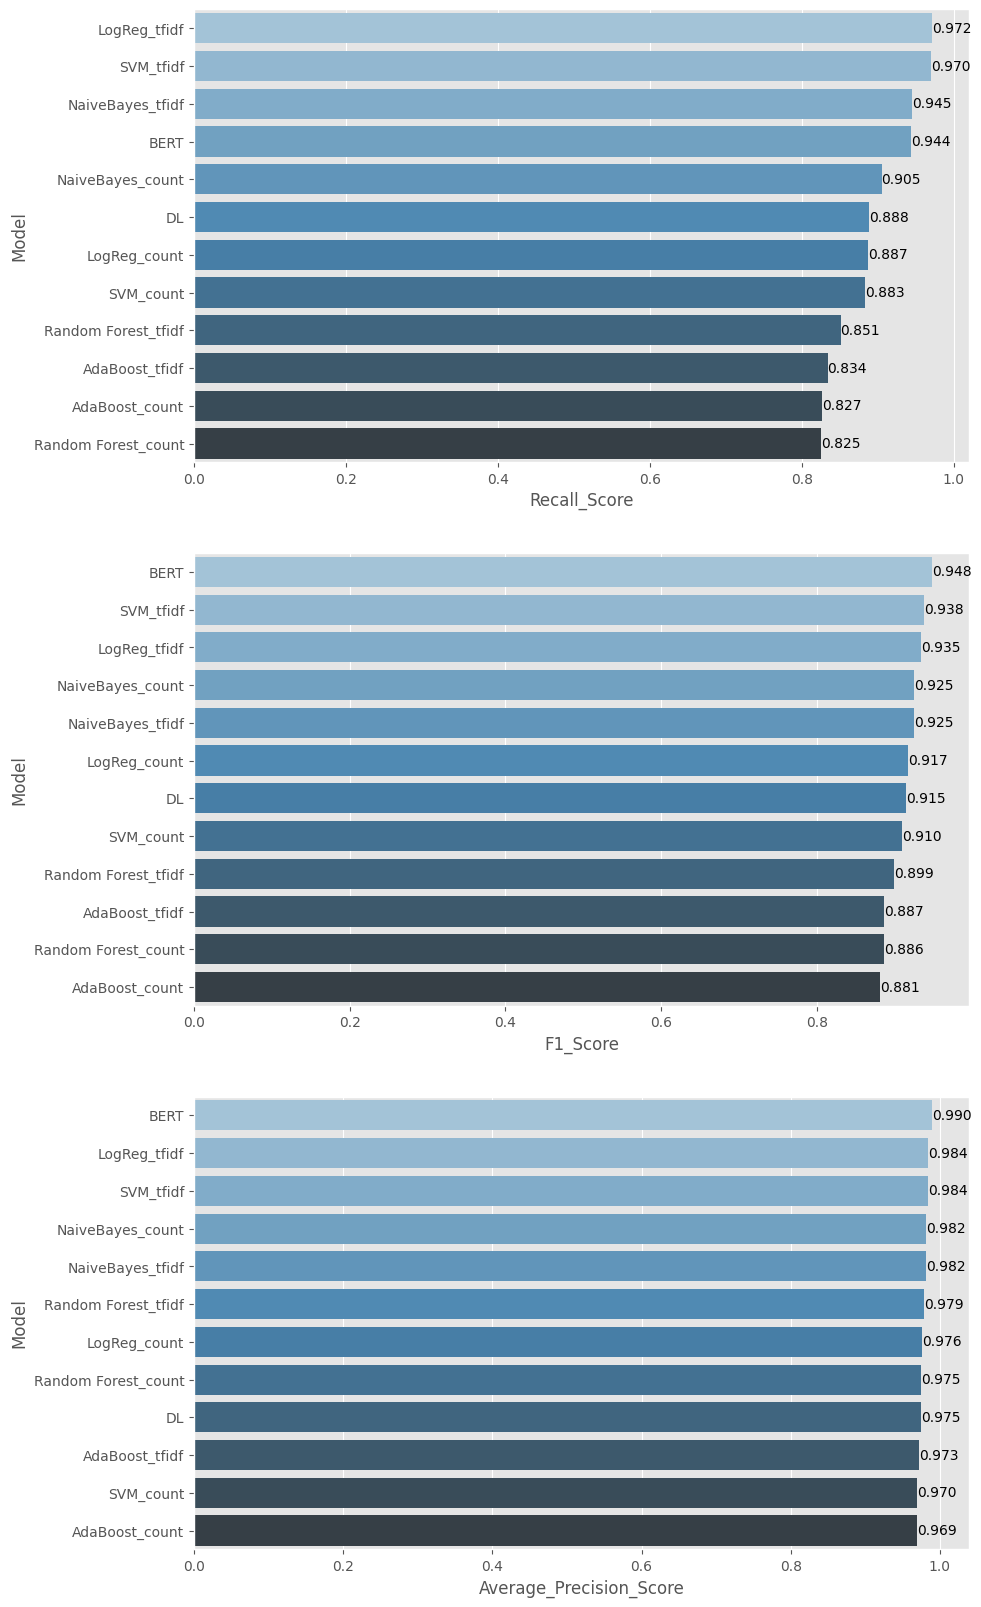

In [288]:



compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, GRU_f1, BERT_f1
                                  ],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, GRU_rec, BERT_rec
                                      ],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, GRU_AP, BERT_AP
                                                    ]})


plt.figure(figsize=(10,20))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

In conclusion, we can determine that we can handle a sentiment analysis problem by using machine learning algorithms, deep learning, or by using BERT. Granted, we had to do a lot of fine-tuning and text cleaning in the machine learning part, but some models of machine learning did very well, such as SVM and Naive Bayes. Deep learning using the GRU model returned good results. BERT did return very good results with little to no fine-tuning, which is expected since it is a pre-trained model.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___